# ***Multiclass Classification: MNIST Dataset***

In [29]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
# Download the dataset

mnist = fetch_openml('mnist_784', version=1, data_home="D:\Deep Learning and Machine Learning Online Degree\Hands on Machine Learning Book codes\Classification", as_frame=True)

In [3]:
# Train test split of data

x, y = mnist["data"], mnist["target"]
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

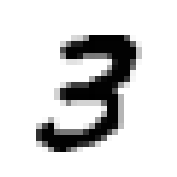

In [4]:
# Plot an image to get prediction later

img1 = x_train.to_numpy()[7]
img_disp = img1.reshape(28,28)

plt.figure(figsize=(3,3))
plt.imshow(img_disp, cmap="binary")
plt.axis("off")
plt.show()

### ***Support Vector Machine Classifier***

In [5]:
# Support Vector machine Classifier

svm_clf = SVC()
svm_clf.fit(x_train, y_train)

SVC()

#### Prediction

In [6]:
svm_clf.predict([img1])

array(['3'], dtype=object)

In [7]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [8]:
# OvO / OvR strategy

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC())

#### Prediction

In [9]:
ovr_clf.predict([img1])

array(['3'], dtype='<U1')

In [10]:
ovr_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

### ***SGD Classifier***

In [11]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [12]:
sgd_clf.predict([img1])

array(['3'], dtype='<U1')

In [13]:
sgd_clf.decision_function([img1])

array([[-24867.18716121, -37122.25595818,  -7846.41141961,
          4835.85930092, -19028.09581523, -14820.97964365,
        -41757.85528915, -32909.38997336,  -2245.41766541,
         -8407.82238625]])

#### Above are the confidence scores for each class

#### ***Using Standard Scalar***

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled, y_train, cv=3, scoring="accuracy")

D:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9019, 0.8919, 0.9002])

### ***Error Analysis***

In [18]:
y_train_preds = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv = 3)
con_matrix = confusion_matrix(y_train, y_train_preds)
con_matrix

D:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5562,    0,   21,    5,    8,   44,   36,    5,  241,    1],
       [   0, 6402,   37,   21,    4,   43,    4,    7,  212,   12],
       [  28,   27, 5217,   93,   71,   26,   64,   35,  387,   10],
       [  22,   18,  116, 5207,    1,  206,   26,   38,  427,   70],
       [  12,   14,   44,    9, 5183,   13,   31,   25,  345,  166],
       [  26,   15,   29,  163,   52, 4459,   73,   14,  534,   56],
       [  28,   16,   43,    2,   43,   98, 5545,    4,  138,    1],
       [  21,    8,   50,   23,   50,   13,    3, 5687,  203,  207],
       [  18,   66,   45,   87,    3,  128,   24,   11, 5427,   42],
       [  21,   18,   30,   61,  115,   38,    1,  178,  385, 5102]],
      dtype=int64)

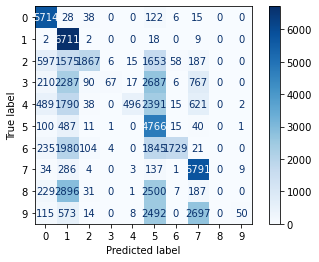

In [22]:
# Plot the confusion matrix: Using inbuilt function
sklearn.metrics.plot_confusion_matrix(sgd_clf, x_train_scaled, y_train,cmap=plt.cm.Blues)

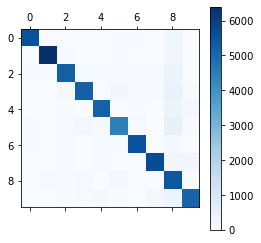

In [24]:
plt.matshow(con_matrix, cmap= plt.cm.Blues)
plt.colorbar()
plt.show()

### ***Errors***

In [27]:
row_sums = con_matrix.sum(axis =1, keepdims=True)
norm_conf_mx = con_matrix / row_sums

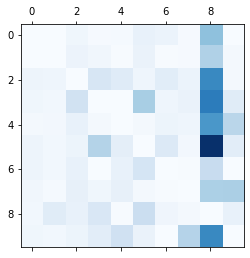

In [28]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap= plt.cm.Blues)
plt.show()

### ***Multilabel Classification***

In [31]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

TypeError: Unordered Categoricals can only compare equality or not